# Housing Data Statistics

- Using data_finbar.csv which is from data.csv but I've deleted unnecessary rows and columns.



In [84]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("data_finbar.csv")

rows = len(df.index)

# divide by 13 because each house has 13 rows of data
numHouses = rows // 13


print("-----------October 2022 Price Data----------")

print("N =  " + str(numHouses))

# get all rows from 2022
year2022 = df.loc[df['Year'] == 2022]

octPrices = year2022['Oct']

octPrices.dropna()

# since prices have 'K' and 'M' we need to convert to numbers
# https://stackoverflow.com/questions/59507827/converting-a-string-object-value-with-m-and-k-to-million-and-thousand

def text_to_num(text, bad_data_val = 0):
    d = {
        'K': 1000,
        'M': 1000000,
        'B': 1000000000
    }
    if not isinstance(text, str):
        # Non-strings are bad are missing data in poster's submission
        return bad_data_val

    elif text[-1] in d:
        # separate out the K, M, or B
        num, magnitude = text[:-1], text[-1]
        return int(float(num) * d[magnitude])
    else:
        return float(text)

lst = octPrices.tolist()
# remove nans
cleaned_lst = [x for x in lst if str(x) != 'nan']

clean_prices = []
for i, price in enumerate(cleaned_lst):
    # remove dollar sign
    #print(str(i) + ':' + price)
    price = price[1:]
    result = text_to_num(price)
    clean_prices.append(result)

# this dataframe is all the 2022 October prices to use for statistics

data_2022 = pd.DataFrame(clean_prices, columns=['price'])
min2022 = str(int(data_2022.min()))
max2022 = str(int(data_2022.max()))
mean2022 = str(float(data_2022.mean()))

print("Min = " + min2022)
print("Max =  " + max2022)
print("Mean = " + mean2022)













-----------October 2022 Price Data----------
N =  803
Min = 185400
Max =  15000000
Mean = 956164.8029891305


-----------October 2013 Price Data----------
N = 803
Min =  64700
Max =  5000000
Mean =  389924.9968553459


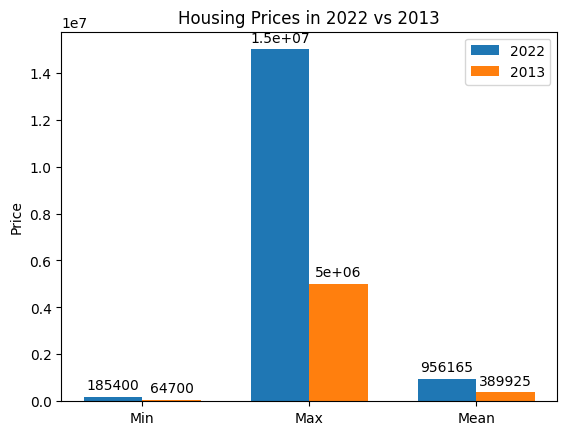

In [85]:
print("-----------October 2013 Price Data----------")

print("N = " + str(numHouses))
# get all rows from 2013
year2013 = df.loc[df['Year'] == 2013]

octPrices = year2013['Oct']

octPrices.dropna()

# since prices have 'K' and 'M' we need to convert to numbers
# https://stackoverflow.com/questions/59507827/converting-a-string-object-value-with-m-and-k-to-million-and-thousand

def text_to_num(text, bad_data_val = 0):
    d = {
        'K': 1000,
        'M': 1000000,
        'B': 1000000000
    }
    if not isinstance(text, str):
        # Non-strings are bad are missing data in poster's submission
        return bad_data_val

    elif text[-1] in d:
        # separate out the K, M, or B
        num, magnitude = text[:-1], text[-1]
        return int(float(num) * d[magnitude])
    else:
        return float(text)

lst = octPrices.tolist()
# remove nans
cleaned_lst = [x for x in lst if str(x) != 'nan']

clean_prices = []
for i, price in enumerate(cleaned_lst):
    # remove dollar sign
    #print(str(i) + ':' + price)
    price = price[1:]
    result = text_to_num(price)
    clean_prices.append(result)

# this dataframe is all the 2022 October prices to use for statistics

data_2013 = pd.DataFrame(clean_prices, columns=['price'])
min2013 = str(int(data_2013.min()))
max2013 = str(int(data_2013.max()))
mean2013 = str(float(data_2013.mean()))


print("Min =  " + min2013)
print("Max =  " + max2013)
print("Mean =  " + mean2013)


labels = ['Min', 'Max', 'Mean']
stats_2022 = [int(min2022), int(max2022), float(mean2022)]
stats_2013 = [int(min2013), int(max2013), float(mean2013)]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, stats_2022, width, label='2022')
rects2 = ax.bar(x + width/2, stats_2013, width, label='2013')
ax.set_ylabel('Price')
ax.set_title('Housing Prices in 2022 vs 2013')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


plt.show()


